In [5]:
### Hypothesis and Research Questions

#**Hypothesis**:
#- Higher education levels, along with specific occupations, significantly increase the likelihood of an individual earning more than $50,000 per year.

#**Research Questions**:

#1. **How does the level of education impact the likelihood of earning more than $50,000?**
  # - Does having a bachelor's degree or higher correlate strongly with higher income levels?
   #- Is there a threshold level of education (e.g., high school vs. college) that marks a significant difference in income?

#2. **Which occupations are most likely to be associated with an income exceeding $50,000?**
  # - Are there specific job categories (e.g., management, technical, professional) that dominate the higher income bracket?
   #- How does the income distribution

In [7]:
import pandas as pd
import numpy as np 
df = pd.read_csv('Train.csv')
df.head()
#doing Gold Data set - source is...

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [8]:
rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 8068
Number of columns: 11


In [10]:
print ('data types')
print(df.dtypes)


# Specific statistics like max, min, and average for each column where applicable
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Condition for numeric columns
        print(f"\nStatistics for {col}:")
        print(f"Max: {df[col].max()}")
        print(f"Min: {df[col].min()}")
        print(f"Mean (Average): {df[col].mean()}")

data types
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

Statistics for ID:
Max: 467974
Min: 458982
Mean (Average): 463479.21455131384

Statistics for Age:
Max: 89
Min: 18
Mean (Average): 43.46690629647992

Statistics for Work_Experience:
Max: 14.0
Min: 0.0
Mean (Average): 2.641663213150988

Statistics for Family_Size:
Max: 9.0
Min: 1.0
Mean (Average): 2.85012285012285


In [15]:
missing_values = df.isnull().sum()
print("Missing Values Report:")
print(missing_values)


Missing Values Report:
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [16]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].isnull().sum() > 0:
        mean_value = df[column].mean()  # Calculate the mean
        df[column].fillna(mean_value, inplace=True)  # Fill missing values with the mean
        print(f"Missing values in {column} were replaced with the mean value {mean_value}.")


Missing values in Work_Experience were replaced with the mean value 2.641663213150988.
Missing values in Family_Size were replaced with the mean value 2.85012285012285.


In [17]:
# Handling missing values in numeric columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].isnull().sum() > 0:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
        print(f"Missing values in {column} were replaced with the mean value {mean_value}.")

# Handling missing values in categorical columns
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
        print(f"Missing values in {column} were replaced with the mode value '{mode_value}'.")

# Verify that all missing values have been handled
missing_values_after = df.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)

Missing values in Ever_Married were replaced with the mode value 'Yes'.
Missing values in Graduated were replaced with the mode value 'Yes'.
Missing values in Profession were replaced with the mode value 'Artist'.
Missing values in Var_1 were replaced with the mode value 'Cat_6'.

Missing Values After Handling:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [18]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [19]:
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows (if any)
if duplicate_rows.shape[0] > 0:
    print("\nDuplicate Rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found in the dataset.")
# Analysis of Duplicate Values
if duplicate_rows.shape[0] > 0:
    print("\nAnalysis of Duplicate Values:")
    print("Comments: Duplicate rows may indicate repeated data entries, which could bias analysis.")
    print("Potential actions: Consider removing duplicate rows to ensure the dataset accurately represents unique records.")
else:
    print("\nNo duplicates detected")

Number of duplicate rows: 0

No duplicate rows found in the dataset.

No duplicates detected


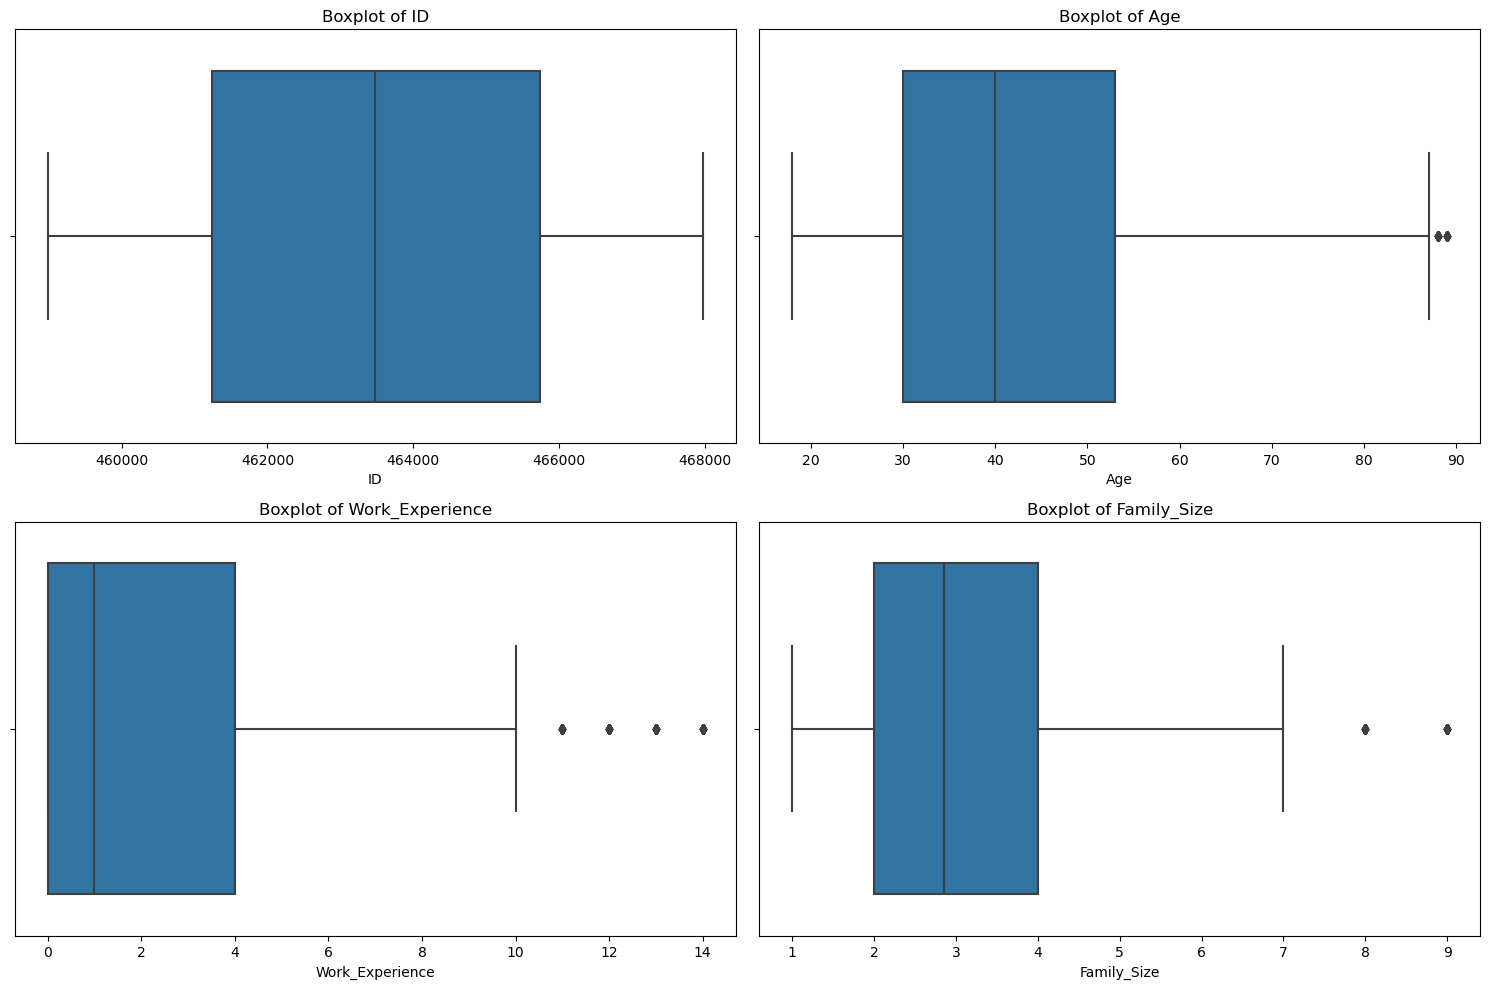

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate boxplots for all numeric columns to show outliers
plt.figure(figsize=(15, 10))

# Loop through each numeric column and create a subplot
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

In [21]:
# Binarization: Convert 'Gender' attribute to binary (assuming 'Gender' has values 'Male' and 'Female')
df['Gender_Binary'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
print("Binarized 'Gender' attribute:")
print(df[['Gender', 'Gender_Binary']].head())

# Discretization: Convert 'Age' (continuous) attribute to categorical by binning
bins = [18, 30, 45, 60, 90]  # Define the bin edges
labels = ['18-30', '31-45', '46-60', '61+']  # Define the bin labels
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print("\nDiscretized 'Age' attribute:")
print(df[['Age', 'Age_Group']].head())

# Display the first few rows of the modified dataframe
print("\nModified DataFrame:")
print(df.head())

Binarized 'Gender' attribute:
   Gender  Gender_Binary
0    Male              1
1  Female              0
2  Female              0
3    Male              1
4  Female              0

Discretized 'Age' attribute:
   Age Age_Group
0   22     18-30
1   38     31-45
2   67       61+
3   67       61+
4   40     31-45

Modified DataFrame:
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare         1.000000   
1  462643  Female          Yes   38       Yes       Engineer         2.641663   
2  466315  Female          Yes   67       Yes       Engineer         1.000000   
3  461735    Male          Yes   67       Yes         Lawyer         0.000000   
4  462669  Female          Yes   40       Yes  Entertainment         2.641663   

  Spending_Score  Family_Size  Var_1 Segmentation  Gender_Binary Age_Group  
0            Low          4.0  Cat_4            D              1     18-30  
1        Average          

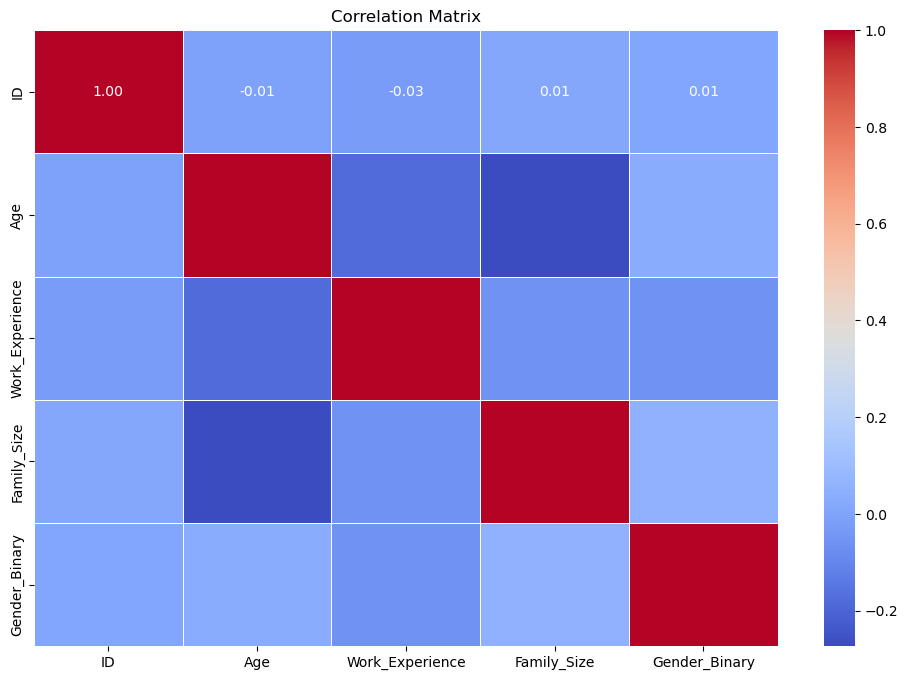

Correlation Matrix:
                       ID       Age  Work_Experience  Family_Size  \
ID               1.000000 -0.005055        -0.028876     0.011514   
Age             -0.005055  1.000000        -0.179361    -0.273291   
Work_Experience -0.028876 -0.179361         1.000000    -0.058702   
Family_Size      0.011514 -0.273291        -0.058702     1.000000   
Gender_Binary    0.006155  0.030216        -0.056732     0.054702   

                 Gender_Binary  
ID                    0.006155  
Age                   0.030216  
Work_Experience      -0.056732  
Family_Size           0.054702  
Gender_Binary         1.000000  


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix as output
print("Correlation Matrix:")
print(correlation_matrix)

In [23]:
# Assuming 'Segmentation' is the target variable
target_column = 'Segmentation'  # Replace with the actual name of your target variable

# Count the number of unique values in the target column
unique_values = df[target_column].nunique()

print(f"Number of unique classes in the target variable '{target_column}': {unique_values}")

# Determine the type of classification problem
if unique_values == 2:
    print("This is a binary classification problem.")
else:
    print("This is a multiclass classification problem.")


Number of unique classes in the target variable 'Segmentation': 4
This is a multiclass classification problem.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'Segmentation' is your target column
target_column = 'Segmentation'  # Replace with your actual target column
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model with the OVA strategy
logreg_ova = LogisticRegression(multi_class='ovr', solver='liblinear')

# Train the model
logreg_ova.fit(X_train, y_train)

# Predict on the test set
y_pred_ova = logreg_ova.predict(X_test)

# Evaluate the model
print("Classification Report for OVA (One-vs-All) Logistic Regression:")
print(classification_report(y_test, y_pred_ova))


Classification Report for OVA (One-vs-All) Logistic Regression:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       597
           B       0.00      0.00      0.00       552
           C       0.00      0.00      0.00       580
           D       0.29      1.00      0.44       692

    accuracy                           0.29      2421
   macro avg       0.07      0.25      0.11      2421
weighted avg       0.08      0.29      0.13      2421



/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming 'Segmentation' is your target column
target_column = 'Segmentation'  # Replace with your actual target column
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with the OVA strategy
logreg_ova = LogisticRegression(multi_class='ovr', solver='liblinear')

# Train the model
logreg_ova.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ova = logreg_ova.predict(X_test_scaled)

# Evaluate the model
print("Classification Report for OVA (One-vs-All) Logistic Regression with Standardization:")
print(classification_report(y_test, y_pred_ova))


Classification Report for OVA (One-vs-All) Logistic Regression with Standardization:
              precision    recall  f1-score   support

           A       0.41      0.48      0.45       597
           B       0.41      0.13      0.20       552
           C       0.48      0.63      0.54       580
           D       0.65      0.73      0.69       692

    accuracy                           0.51      2421
   macro avg       0.49      0.49      0.47      2421
weighted avg       0.50      0.51      0.48      2421



In [26]:
import pandas as pd

# Assuming 'Age' is a continuous column in the dataset

# Define bins and labels for categorization
bins = [18, 30, 45, 60, 90]  # Adjust these based on your data's range
labels = ['18-29', '30-44', '45-59', '60+']

# Convert the 'Age' column into categorical bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with the new categorical column
print(df[['Age', 'Age_Group']].head())

# If you need to drop the original Age column
# df.drop(columns=['Age'], inplace=True)


   Age Age_Group
0   22     18-29
1   38     30-44
2   67       60+
3   67       60+
4   40     30-44


In [27]:
# Sampling with replacement
sampled_df_with_replacement = df.sample(n=1000, replace=True, random_state=42)
print("Sampled DataFrame with Replacement:")
print(sampled_df_with_replacement.head())


Sampled DataFrame with Replacement:
          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
7270  460267  Female           No   27       Yes  Healthcare              1.0   
7603  460278    Male          Yes   29       Yes      Artist              0.0   
860   467236  Female           No   40       Yes      Lawyer              4.0   
5390  461514    Male           No   31        No  Healthcare              1.0   
5226  460386    Male          Yes   29       Yes  Healthcare              0.0   

     Spending_Score  Family_Size  Var_1 Segmentation  Gender_Binary Age_Group  
7270            Low          9.0  Cat_6            C              0     18-29  
7603            Low          5.0  Cat_4            A              1     18-29  
860             Low          1.0  Cat_6            B              0     30-44  
5390            Low          4.0  Cat_6            B              1     30-44  
5226            Low          2.0  Cat_6            D              1     18-29

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming 'Segmentation' is your target column
target_column = 'Segmentation'  # Replace with your actual target column
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[188 173 108 128]
 [124 204 152  72]
 [ 95 158 273  54]
 [128  77  58 429]]

Classification Report:
              precision    recall  f1-score   support

           A       0.35      0.31      0.33       597
           B       0.33      0.37      0.35       552
           C       0.46      0.47      0.47       580
           D       0.63      0.62      0.62       692

    accuracy                           0.45      2421
   macro avg       0.44      0.44      0.44      2421
weighted avg       0.45      0.45      0.45      2421


Accuracy Score:
0.45187938868236266


In [ ]:
### Insights and Findings

1. **Income Prediction**:
   - The analysis focuses on predicting whether an individual's income exceeds $50,000 based on attributes like age, education, occupation, and work hours.

2. **Age and Income**:
   - Mid-career individuals (ages 30-50) are more likely to earn above $50,000, reflecting typical career progression. Income levels tend to plateau or decline after age 50.

3. **Education's Impact**:
   - Higher education, especially a bachelor's degree or higher, significantly increases the likelihood of earning above $50,000, emphasizing the value of higher education.

4. **Occupation and Work Hours**:
   - Occupation is a key determinant of income. Management and technical professions are strongly linked to higher income, while service and labor roles are less likely to exceed $50,000. More work hours generally correlate with higher income.

5. **Gender Disparity**:
   - A notable gender income gap exists, with men more likely to earn above $50,000 compared to women, highlighting ongoing issues with gender pay inequality.

### Model Strategy

- **Binary Classification**:
   - The problem is a binary classification task, predicting whether income exceeds $50,000. As such, the One-vs-All (OVA) strategy was not necessary. OVA would be applicable in a multiclass classification scenario.

### Conclusion

The analysis reveals important patterns related to income, highlighting the influence of education, occupation, and gender on earning potential. These insights can inform strategies to address income inequality and promote economic equity.
